In [1]:
import tensorflow as tf

from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = datasets.load_iris()
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [3]:
# seed random
seed = 42
tf.set_random_seed(seed)
np.random.seed(seed)

# Laboratorio: 1. Agrega una capa oculta más y que sea:
# [3, 6] *[ ?,? ] * [6, 4] * [4, 1].

# Laboratorio: 2. Utiliza el set del titanic y utiliza tu red neuronal para resolverlo quien se salva y quien no.

## Para cargar un CSV: d1 = pd.read_csv("tuArchivo.csv") 

In [4]:
iris = datasets.load_iris()
x = np.array([x[0:3] for x in iris.data])
y = np.array([x[3] for x in iris.data])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [6]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

In [9]:
#placeholder
x_data = tf.placeholder(shape=[None,3],dtype=tf.float32)
y_data = tf.placeholder(shape=[None,1],dtype=tf.float32)

In [15]:
W1 = tf.Variable(tf.random_normal(shape=[3,6]))
b1 = tf.Variable(tf.random_normal(shape=[6]))
hidden_1 = tf.nn.relu(tf.add(tf.matmul(x_data,W1),b1))

W2 = tf.Variable(tf.random_normal(shape=[6,4]))
b2 = tf.Variable(tf.random_normal(shape=[4]))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1,W2),b2))

W3 = tf.Variable(tf.random_normal(shape=[4,1]))
b3 = tf.Variable(tf.random_normal(shape=[1]))
output = tf.nn.relu(tf.add(tf.matmul(hidden_2,W3),b3))

loss = tf.reduce_mean(tf.square(y_data - output))

optimizer = tf.train.GradientDescentOptimizer(0.005)
train_step = optimizer.minimize(loss)

In [41]:
batchSize = 50
with tf.Session() as sess:
    #Initialize variables
    init = tf.global_variables_initializer()
    sess.run(init)
    
    train_loss =[]
    test_loss = []
    
    for i in range(30):
        random_index = np.random.choice(len(x_train), size = batchSize)
        random_x = x_train[random_index]
        random_y = np.transpose([y_train[random_index]])
        sess.run(train_step,feed_dict={x_data: random_x,
                                       y_data: random_y})
        
        tempTrainLoss = sess.run(loss,feed_dict={x_data: random_x,
                                                 y_data: random_y})
        
        tempTestLoss = sess.run(loss,feed_dict={x_data: x_test,
                                                 y_data: np.transpose([y_test])})
        
        train_loss.append(sess.run(tf.sqrt(tempTrainLoss)))
        test_loss.append(sess.run(tf.sqrt(tempTestLoss)))
        
        print(i , str([tempTrainLoss,tempTestLoss]))
        

0 [1.897, 2.2316666]
1 [1.9815999, 2.2316666]
2 [1.8674, 2.2316666]
3 [1.8064, 2.2316666]
4 [1.844, 2.2316666]
5 [2.5482, 2.2316666]
6 [1.9766, 2.2316666]
7 [2.0171998, 2.2316666]
8 [1.9377999, 2.2316666]
9 [1.7921999, 2.2316666]
10 [1.7865999, 2.2316666]
11 [2.0231998, 2.2316666]
12 [2.04, 2.2316666]
13 [1.8901999, 2.2316666]
14 [1.9327999, 2.2316666]
15 [2.0029998, 2.2316666]
16 [2.0351999, 2.2316666]
17 [2.2785997, 2.2316666]
18 [1.8302001, 2.2316666]
19 [1.9858, 2.2316666]
20 [2.1123998, 2.2316666]
21 [1.8836, 2.2316666]
22 [1.8412, 2.2316666]
23 [1.7843999, 2.2316666]
24 [1.8827999, 2.2316666]
25 [1.8532001, 2.2316666]
26 [2.0802, 2.2316666]
27 [2.0434, 2.2316666]
28 [1.8008, 2.2316666]
29 [1.8006002, 2.2316666]


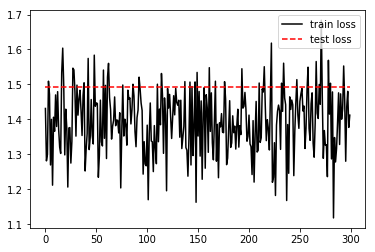

In [39]:
plt.plot(train_loss, 'k-', label='train loss')
plt.plot(test_loss, 'r--', label='test loss')
plt.legend(loc='upper right')
plt.show()